# 20.3 Apply Your Storytelling Skills
<br>

This notebook is an exploratory data analysis of a hyper car specification dataset from 2019. 

We perform visualizations to demonstrate the relationship between our variables for each car. These relationships were found by computing the datas descriptive and inferential statistics. From those, we use them as a starting point for portraying a scenario where we are tasked with finding a "specification" that is the reason for the highest priced car. To present our findings we use a few different visualization techniques such as, categorical swarm plots, histograms, bar plots, and joint plots. 

In [1]:
from IPython.display import display
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.rc({"figure.dpi": 300, 'savefig.dpi': 300})
sns.set_style("ticks")
sns.set_theme(style="darkgrid")
sns.set_palette("muted")
new_style = {'grid': True}
matplotlib.rc('axes', **new_style)

In [2]:
# Load dataset

df = pd.read_csv('./Hyper Cars 2019.csv')

In [3]:
# Rename/clean column and row names

df.rename(columns={'    Toppp-speeed':'top_speed',
                  'Enginee':'engine',
                  '          hp':'horsepower(hp)',
                  '           Cost':'price',
                  '     Car Name':'car_name',
                  '   Transmission':'transmission',
                  'Displacement ':'displacement',
                  'Price':'price'}, inplace=True) 

df.iloc[3,0] = 'McLaren Senna Aaa'
df.iloc[4,0] = 'Koenigsegg Agera'
df.iloc[7,0] = 'Pagani Huayra BC'
df.iloc[9,0] = 'Bugatti Veyron'

In [4]:
# Convert hello (row 6 column Displacement) to the mean of the column

df.iloc[5,1] = 0
df.iloc[:,1] = pd.to_numeric(df.iloc[:,1], downcast="float").round(2)
df.iloc[5,1] = round(np.mean(df.iloc[:,1]), 2)

In [5]:
# Remove "garbage" values

df.iloc[3,2] = 'V8' # From V8987654
df.iloc[7,2] = 'V12' # From _

In [6]:
# Any null values, filled with mean

df = df.fillna(df.mean())

In [7]:
df.head()

,car_name,displacement,engine,horsepower(hp),transmission,top_speed,price
0,McLaren F1,6.1,V12,618.0,6.0,243.0,"25, 000, 000"
1,Bugatti Chiron,8.0,W16,1479.0,7.0,250.0,"3, 000, 000"
2,Mercedes-AMG ONE,1.6,V6,748.0,8.0,217.0,"2, 653, 000"
3,McLaren Senna Aaa,4.0,V8,789.0,7.0,211.0,"1, 500, 000"
4,Koenigsegg Agera,5.0,V8,1016.0,7.0,249.0,"2, 500, 000"


In [8]:
# Check dtypes

df.dtypes

car_name           object
displacement      float32
engine             object
horsepower(hp)    float64
transmission      float64
top_speed         float64
price              object
dtype: object

In [9]:
# Convert price to numerical

df['price'] = df['price'].convert_dtypes(convert_string=True)

In [10]:
# Clean whitespace of large numbers

df.price = df.price.str.replace(',', '').str.strip()
df.price = df.price.str.replace(' ', '')
df.price = pd.to_numeric(df.price)

In [11]:
df.engine = df.engine.str.replace('V', '').str.strip()
df.engine = df.engine.str.replace('W', '').str.strip()
df.head()

,car_name,displacement,engine,horsepower(hp),transmission,top_speed,price
0,McLaren F1,6.1,12,618.0,6.0,243.0,25000000
1,Bugatti Chiron,8.0,16,1479.0,7.0,250.0,3000000
2,Mercedes-AMG ONE,1.6,6,748.0,8.0,217.0,2653000
3,McLaren Senna Aaa,4.0,8,789.0,7.0,211.0,1500000
4,Koenigsegg Agera,5.0,8,1016.0,7.0,249.0,2500000


In [12]:
df['top_speed'] = df['top_speed'].values.round(2)
df['top_speed'] = df['top_speed'].astype(int)

In [13]:
df.sort_values('price')

,car_name,displacement,engine,horsepower(hp),transmission,top_speed,price
5,Porsche 918 Spyder,5.16,8,916.375,7.0,211,900000
3,McLaren Senna Aaa,4.00,8,789.000,7.0,211,1500000
6,Ferrari LaFerrari,6.30,12,949.000,7.0,236,2000000
9,Bugatti Veyron,8.00,16,987.000,7.0,267,2000000
4,Koenigsegg Agera,5.00,8,1016.000,7.0,249,2500000
7,Pagani Huayra BC,6.00,12,745.000,7.0,230,2550000
2,Mercedes-AMG ONE,1.60,6,748.000,8.0,217,2653000
1,Bugatti Chiron,8.00,16,1479.000,7.0,250,3000000
8,Aston Martin Valkyrie,6.59,12,916.375,7.0,250,3200000
0,McLaren F1,6.10,12,618.000,6.0,243,25000000


In [14]:
# Descriptive stats of whole dataset

df.describe()

,displacement,horsepower(hp),transmission,top_speed,price
count,10.000000,10.000000,10.000000,10.000000,1.000000e+01
mean,5.675000,916.375000,7.000000,236.400000,4.530300e+06
std,1.899048,234.638226,0.471405,18.904438,7.225378e+06
min,1.600000,618.000000,6.000000,211.000000,9.000000e+05
25%,5.040000,758.250000,7.000000,220.250000,2.000000e+06
50%,6.050000,916.375000,7.000000,239.500000,2.525000e+06
75%,6.517500,977.500000,7.000000,249.750000,2.913250e+06
max,8.000000,1479.000000,8.000000,267.000000,2.500000e+07


In [15]:
# Get the mean, std, var, and correlation 

print("Mean\n\n", df.mean()) # Mean
print("\nSTD\n\n", np.std(df)) # Standard deviation
print("\nVariance\n\n", np.var(df)) # Variance
print("\nCorrelation\n\n", df.corr()) # Correlation

Mean

 displacement      5.675000e+00
engine            1.216689e+14
horsepower(hp)    9.163750e+02
transmission      7.000000e+00
top_speed         2.364000e+02
price             4.530300e+06
dtype: float64

STD

 displacement      1.801595e+00
horsepower(hp)    2.225974e+02
transmission      4.472136e-01
top_speed         1.793432e+01
price             6.854595e+06
dtype: float64

Variance

 displacement      3.245745e+00
horsepower(hp)    4.954959e+04
transmission      2.000000e-01
top_speed         3.216400e+02
price             4.698547e+13
dtype: float64

Correlation

                 displacement  horsepower(hp)  transmission  top_speed  \
displacement        1.000000        0.534230     -0.558522   0.748552   
horsepower(hp)      0.534230        1.000000      0.130590   0.417931   
transmission       -0.558522        0.130590      1.000000  -0.324170   
top_speed           0.748552        0.417931     -0.324170   1.000000   
price               0.095409       -0.418839     -0.7

In [16]:
# Get descriptive stats from dataset using profiler, check own results from above

r = pandas_profiling.ProfileReport(df)
display(r)

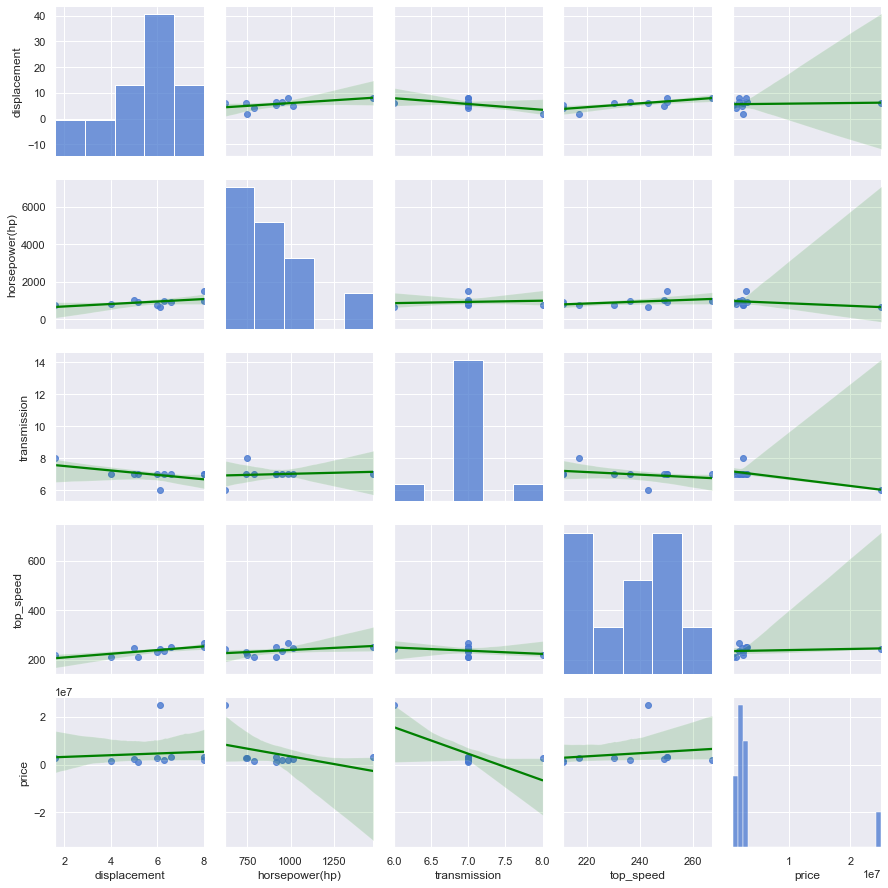

In [17]:
# Pair plot with KWS line, view distributions

sns.pairplot(df, kind="reg", plot_kws={'line_kws':{'color':'green'}})

plt.tight_layout()
plt.show()

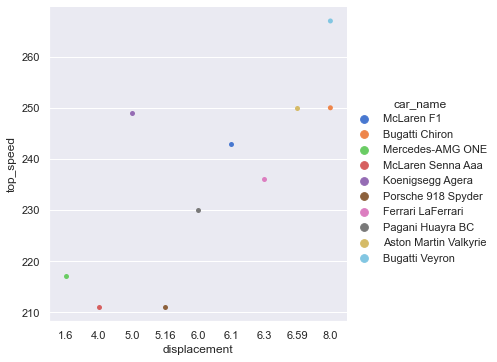

In [18]:
# Displacement vs top speed - swarm plot

sns.catplot(x='displacement', y='top_speed', hue='car_name', kind='swarm', data=df)
plt.show()

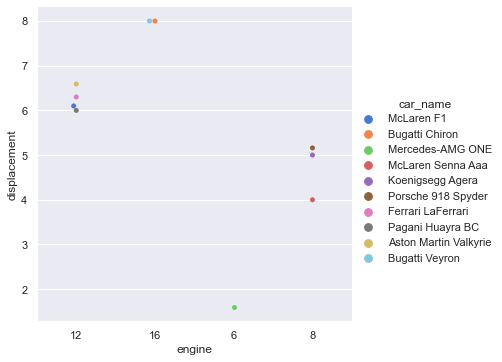

In [19]:
# Displacement vs engine - swarm plot

sns.catplot(x='engine', y='displacement', hue='car_name', kind='swarm', data=df)
plt.show()

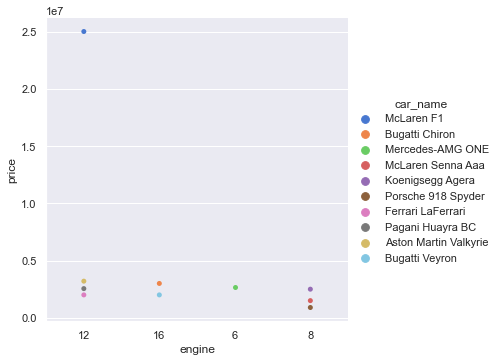

In [20]:
# Engine vs price - swarm plot

sns.catplot(x='engine', y='price', hue='car_name', kind='swarm', data=df)
plt.show()

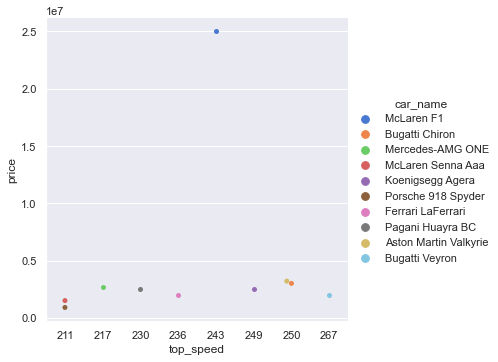

In [23]:
# Top speed vs price - swarm plot

sns.catplot(x='top_speed', y='price', hue='car_name', kind='swarm', data=df)
plt.show()

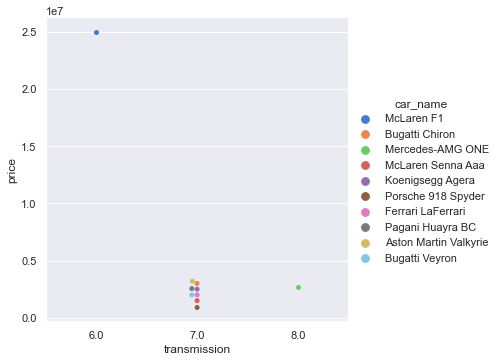

In [24]:
# Transmission vs price - swarm plot

sns.catplot(x='transmission', y='price', hue='car_name', kind='swarm', data=df)
plt.show()

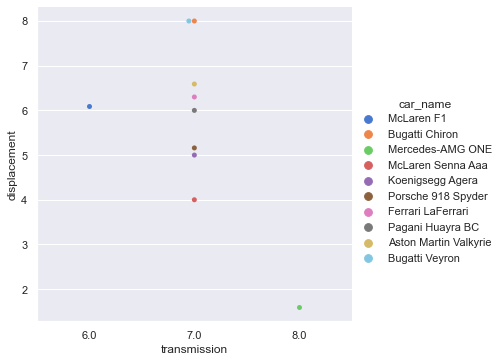

In [34]:
# Transmission vs displacement - swarm plot

sns.catplot(x='transmission', y='displacement', hue='car_name', kind='swarm', data=df)
plt.show()

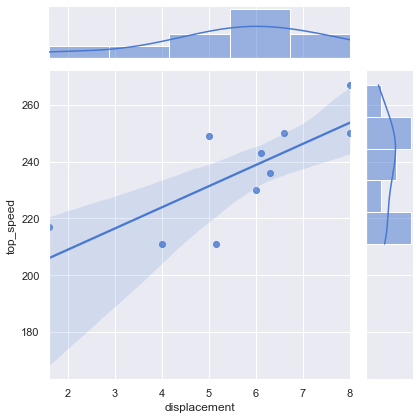

In [22]:
# Joint plot of two correlated variables

sns.jointplot(x="displacement", y="top_speed", data=df, kind="reg")
plt.tight_layout()
plt.show()

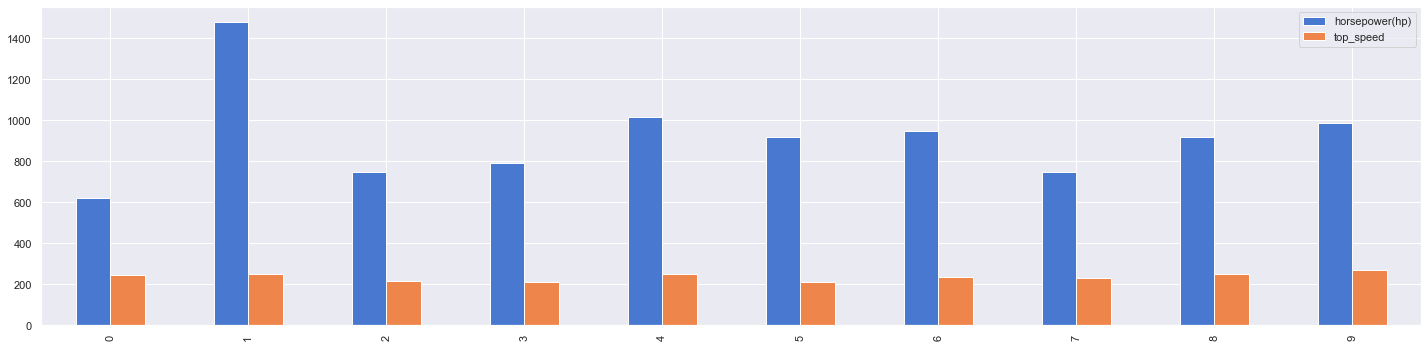

In [101]:
# HP vs top speed - bar plot

df[['horsepower(hp)', 'top_speed']].plot.bar(figsize=(20,5))

plt.tight_layout()
plt.show()

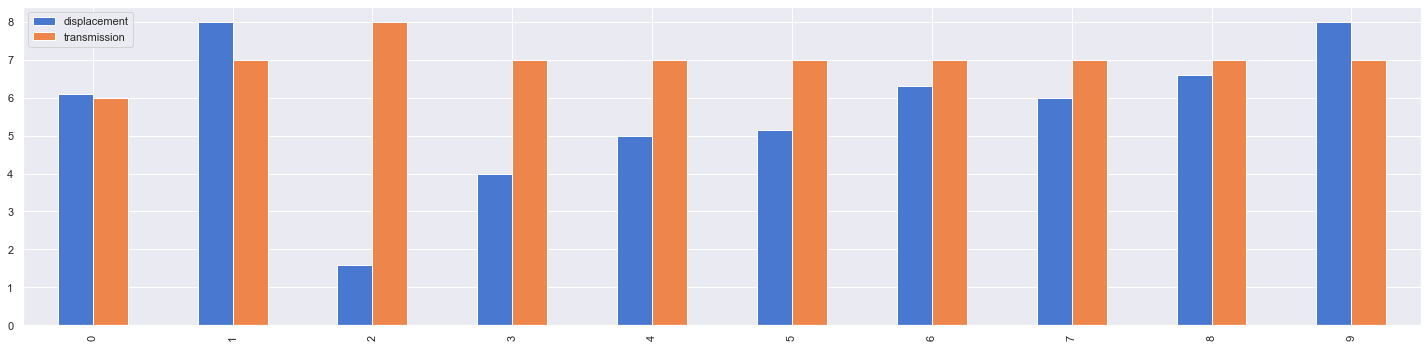

In [33]:
# Displacement vs transmission - bar plot

df[['displacement', 'transmission']].plot.bar(figsize=(20,5))

plt.tight_layout()
plt.show()

# Conclusion
<br>

In this notebook, we explored a dataset containing 10 different "Hyper Cars" and analyzed the relationship between variables parallel to the respective car. The objective here was to try and find a relationship between the car specs and its price. To do this we perform an EDA, starting with retrieving the datasets descriptive and inferential statistics (i.e. mean, variance, std, correlation etc.). Using "pandas_profiler" we generated a simple report that shows us the unique relationships and correlations between our variables, along with a few plots to provide a visualization. The report showed a strong correlation between transmission, displacement and price. There was also a correlation between displacement and top speed. We then used a pair plot to confirm the reports correlation matrix, which checked out. Using those findings as a potential lead, we performed some manual plotting using seaborn categorical swarm plots as well as bar plots to compare the high correlation variables visually. Variables with the most amount of variance are the most useful in this case, as most cars have similar specifications. That being said, the variables differentiating the highest priced car (McLaren F1) from the rest would be displacement, transmission and engine. The McLaren F1 has the most balanced ratio comparatively speaking between displacement and transmission, which sets it apart from the other V12 engines in its class. So even though it has a below average amount of horsepower of 618 with the average being 916, it still has an above average top speed. 

As a whole, we found that one individual specification doesn't define a hyper cars price. Price is better reflected by looking at how balanced the cars specifications are overall while being able to stay above the average top speed in its class. Another example of this aside from the McLaren which is somewhat an outlier, would be the Aston Martin Valkyrie. Looking at the plots showing displacement, transmission, top speed and engine variable relationships you can see it is fairly balanced while still above average in each.